In [2]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = np.array([9749980, 8454720, 7927641.78, 9334944, 11240298.9, 9953880.58, 9688156, 9953306, 9615500.4737955, 9976637, 9388925, 9432804.196, 9351451.60, 8617825.78, 9347162.58, 9908930.32, 9742593.97, 10394478.28, 10229169.56, 10318585.63, 10205788.61, 9385825.83, 9303929.48, 9075712.41, 9158824.33, 8535646.24, 9901972.85, 10162695.32, 10950164.72, 10536704.25, 10858969.23, 10882527.48, 10319807.85, 10325667.96, 9879076.29, 9946481.95, 10102355.61, 9702368.92, 11196720.75, 11268532.52, 11788952.98, 11090566.69])

In [4]:
N = len(data)
L = 12
K = N - L + 1

In [5]:
X = np.column_stack([data[i:i+L] for i in range(0,K)])

Text(0.5, 1.0, 'Matriks Lintasan Pada Data Tersebut')

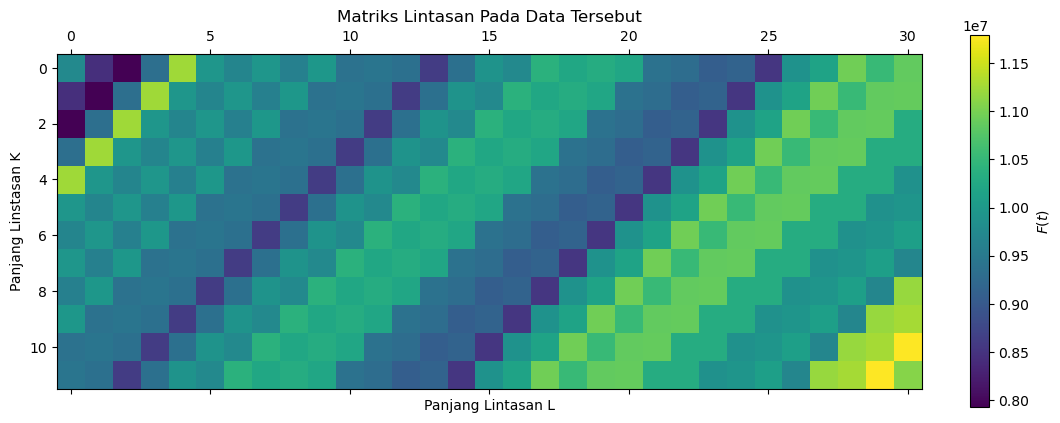

In [6]:
ax = plt.matshow(X)
plt.xlabel("Panjang Lintasan L")
plt.ylabel("Panjang Linstasan K")
plt.colorbar(ax.colorbar, fraction=0.050)
ax.colorbar.set_label("$F(t)$")
plt.title("Matriks Lintasan Pada Data Tersebut")

In [7]:
# Mencari Rank Matriks X
d = np.linalg.matrix_rank(X)

# SVD Matriks X
U, Sigma, V = np.linalg.svd(X)
V = V.T

In [8]:
print('Dimensi Matriks U:', U.shape)
print('Dimensi Sigma Value:', Sigma.shape)
print('Dimensi Matrik V:', V.shape)

Dimensi Matriks U: (12, 12)
Dimensi Sigma Value: (12,)
Dimensi Matrik V: (31, 31)


In [9]:
eigen = np.linalg.eig(np.dot(X, X.T))
eigen[1][:, 0]

array([-0.2836081 , -0.28472742, -0.28643073, -0.28863402, -0.28910502,
       -0.28791419, -0.28806031, -0.288046  , -0.28931077, -0.2909396 ,
       -0.29275344, -0.29439412])

In [10]:
lambda_i = []
for i in range(0,d):
    lambda_i.append(eigen[0][i])

lambda_i = np.array(lambda_i)
lambda_i.shape

(12,)

In [11]:
sigular = []
for i in range(0, len(lambda_i)):
    sigular.append(np.sqrt(lambda_i[i]))

sigular = np.array(sigular)
sigular.shape

(12,)

In [12]:
X_elem = np.array([Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d)])

if not np.allclose(X, X_elem.sum(axis=0), atol=1e-10):
    print("WARNING: Hasil Total Penjumlahan nya tidak sama")

In [17]:
def Hankelise(X):
    """
    Hankelises the matrix X, returning H(X).
    """
    L, K = X.shape
    transpose = False
    if L > K:
        X = X.T
        L, K = K, L
        transpose = True

    HX = np.zeros((L,K))
    
    for m in range(L):
        for n in range(K):
            s = m+n
            if 0 <= s <= L-1:
                for l in range(0,s+1):
                    HX[m,n] += 1/(s+1)*X[l, s-l]    
            elif L <= s <= K-1:
                for l in range(0,L-1):
                    HX[m,n] += 1/(L-1)*X[l, s-l]
            elif K <= s <= K+L-2:
                for l in range(s-K+1,L):
                    HX[m,n] += 1/(K+L-s-1)*X[l, s-l]
    if transpose:
        return HX.T
    else:
        return HX

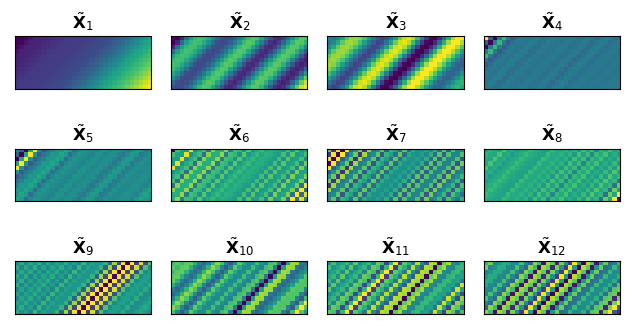

In [20]:
n = min(d, 12)
groping = []
for j in range(0,n):
    plt.subplot(4,4,j+1)
    title = r"$\tilde{\mathbf{X}}_{" + str(j + 1) + "}$"
    plt.imshow(Hankelise(X_elem[j]))
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    groping.append(Hankelise(X_elem[j]))
plt.tight_layout()
X_Group = np.array(groping)

In [13]:
def X_to_TS(X_i):
    """Rata-rata diagonal dari matriks dasar tertentu, X_i, sesuai deret waktu."""
    # ubah urutan ordering
    X_rev = X_i[::-1]
    
    # Full credit to Mark Tolonen at https://stackoverflow.com/a/6313414 for this one:
    return np.array([X_rev.diagonal(i).mean() for i in range(-X_i.shape[0]+1, X_i.shape[1])])

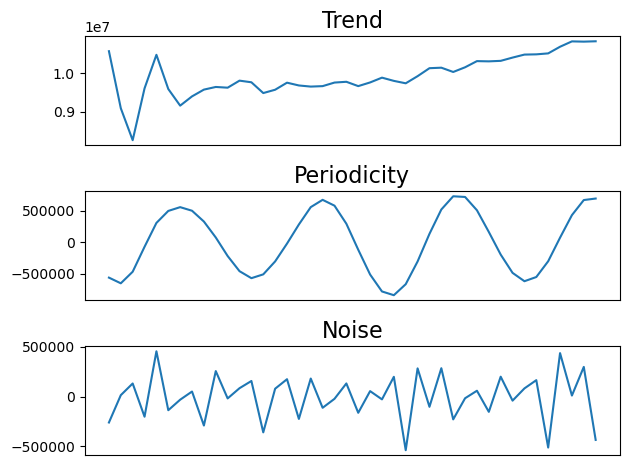

In [21]:
# Tentuikan dari grafik sebelumnya, yang mana trend, yang mana periodic, dan yang mana noise, lalu di cari rata-rata diagonalnya.
Ftrend = X_to_TS(X_elem[[0,3,4]].sum(axis=0))
Fperiodic = X_to_TS(X_elem[[1,2]].sum(axis=0))
Fnoise = X_to_TS(X_elem[5:].sum(axis=0))
t = np.arange(0, len(data))

# Plot
components = [("Trend", Ftrend),
              ("Periodicity", Fperiodic),
              ("Noise", Fnoise)]

# Misahin Plot
fig = plt.figure()
n=1
for name, ssa_comp in components:
    ax = fig.add_subplot(3,1,n)
    ax.plot(t, ssa_comp)
    ax.set_title(name, fontsize=16)
    ax.set_xticks([])
    n += 1

fig.tight_layout()

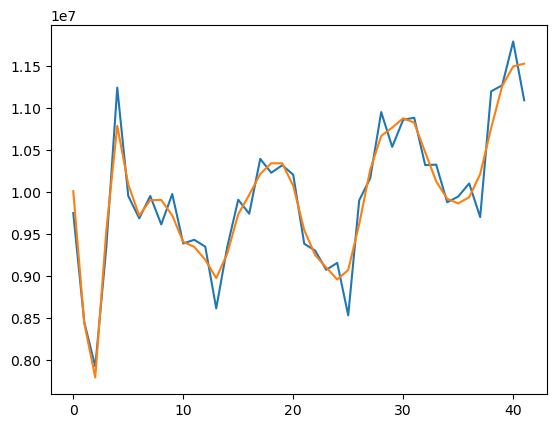

In [23]:
# plot data tanpa noise
plt.plot(t, data)
lat_without_noise = X_to_TS(X_elem[0:5].sum(axis=0))
plt.plot(t, lat_without_noise)